# Find neighbor words

In [2]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
# most similar only uses cosine similarity, therfore not totally perfect as wanted in the assignment
print('King:',model.similar_by_word('King', topn=5))
print('London:',model.similar_by_word('London', topn=5))
print('Good:',model.similar_by_word('Good', topn=5))
print('Apple:',model.similar_by_word('Apple', topn=5))

King: [('Jackson', 0.5326348543167114), ('Prince', 0.5306329727172852), ('Tupou_V.', 0.5292825698852539), ('KIng', 0.5227501392364502), ('e_mail_robert.king_@', 0.5173623561859131)]
London: [('EURASIAN_NATURAL_RESOURCES_CORP.', 0.6739696860313416), ('Londons', 0.6536128520965576), ('Islamabad_Slyvia_Hui', 0.6375559568405151), ('Wandsworth', 0.6133824586868286), ('Canary_Wharf', 0.6119279861450195)]
Good: [('Bad', 0.6172203421592712), ('good', 0.5586156249046326), ('Decent', 0.5168190002441406), ('Better', 0.5037919878959656), ('LAKE_WYLIE_Largemouth_Bass', 0.500469982624054)]
Apple: [('Apple_AAPL', 0.7456985712051392), ('Apple_Nasdaq_AAPL', 0.7300410270690918), ('Apple_NASDAQ_AAPL', 0.7175089716911316), ('Apple_Computer', 0.7145973443984985), ('iPhone', 0.6924266219139099)]


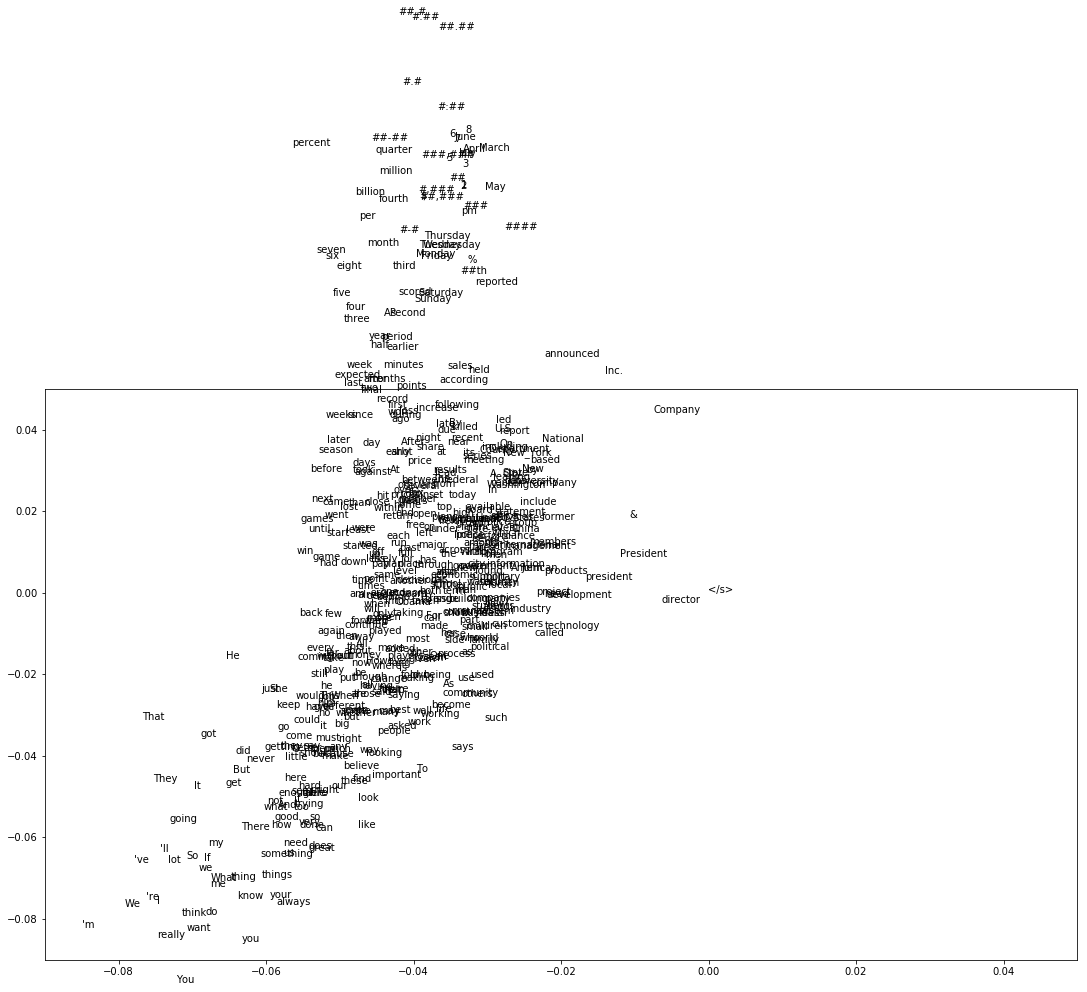

In [6]:
import numpy as np
import matplotlib.pyplot as plt

U, s, Vh = np.linalg.svd(model.vectors[:500], full_matrices = False)

#plot
for i in range(500):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.text(U[i,0], U[i,1], model.index2word[i])
    plt.xlim((-0.09,0.05))
    plt.ylim((-0.09,0.05))

plt.show()

# Main Task

In [12]:
with open('data/questions-words.txt') as f:
    content = f.readlines()

In [13]:
# Example subtract
model.most_similar(positive=['Baghdad', 'Greece'], negative=['Athens'])

[('Iraqi', 0.6351870894432068),
 ('Mosul', 0.6185438632965088),
 ('Iraq', 0.604138195514679),
 ('Sunni_Arab', 0.5862730145454407),
 ('Iraqis', 0.5799270868301392),
 ('Anbar', 0.5743235349655151),
 ('Samarra', 0.5673612356185913),
 ('Shiite', 0.5598145723342896),
 ('Diyala_province', 0.5576438307762146),
 ('Kirkuk', 0.5559762716293335)]

In [49]:
from gensim.similarities.index import AnnoyIndexer
# Read text file, remove last item
expected_syn = []
predict_syn = []
expected_sem = []
predict_sem = []
syntax = False
semantics = False
for line in content:
    splited_line = line.rstrip().split(' ')
    predict_line = line.rstrip().split(' ')[:-1]
    if (line.startswith( ': gram' ) or syntax == True):
        syntax = True
        semantics = False
        if not line.startswith( ':' ):
            expected_syn.append(splited_line)
            predict_syn.append(predict_line)
    elif (line.startswith( ':' ) or semantics == True):
        semantics = True
        syntax = False
        if not line.startswith( ':' ):
            expected_sem.append(splited_line)
            predict_sem.append(predict_line)

print(len(expected_syn))
print(len(predict_syn))
print(len(expected_sem))
print(len(predict_sem))

10675
10675
8869
8869


In [50]:
predicted = predict_syn
expected = expected_syn
labels_syn = np.zeros(len(predicted))
for index in range(len(predicted)):
    first_word = predicted[index][0]
    second_word = predicted[index][1]
    third_word = predicted[index][2]
    [(word, similarity)] = model.most_similar(positive=[third_word, second_word], negative=[first_word],topn=1)
    if len(predicted[index]) < 4:
        predicted[index].append(word.rstrip())
    if index % 1000 == 0:
        print("Amount of processed:",index)
    if predicted[index] == expected[index]:
        labels_syn[index]= 1
    else:
        labels_syn[index]= 0

Amount of processed: 0
Amount of processed: 1000
Amount of processed: 2000
Amount of processed: 3000
Amount of processed: 4000
Amount of processed: 5000
Amount of processed: 6000
Amount of processed: 7000
Amount of processed: 8000
Amount of processed: 9000
Amount of processed: 10000


In [51]:
predicted = predict_sem
expected = expected_sem
labels_sem = np.zeros(len(predicted))
for index in range(len(predicted)):
    first_word = predicted[index][0]
    second_word = predicted[index][1]
    third_word = predicted[index][2]
    [(word, similarity)] = model.most_similar(positive=[third_word, second_word], negative=[first_word],topn=1)
    if len(predicted[index]) < 4:
        predicted[index].append(word.rstrip())
    if index % 1000 == 0:
        print("Amount of processed words:",index)
    if predicted[index] == expected[index]:
        labels_sem[index]= 1
    else:
        labels_sem[index]= 0

Amount of processed words: 0
Amount of processed words: 1000
Amount of processed words: 2000
Amount of processed words: 3000
Amount of processed words: 4000
Amount of processed words: 5000
Amount of processed words: 6000
Amount of processed words: 7000
Amount of processed words: 8000


In [53]:
# Accuracy Syntax
from sklearn.metrics import accuracy_score
accuracy_score(np.ones(len(expected_syn)),labels_syn)

0.7400468384074942

In [54]:
# Accuracy Semantics
accuracy_score(np.ones(len(expected_sem)),labels_sem)

0.7308602999210734

In [56]:
# Overall accuracy
all_labels = np.ones(len(expected_syn) + len(expected_sem))
accuracy_score(all_labels,np.append(labels_syn,labels_sem))

0.7358780188293083